In [22]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

# Chest X-Ray Pneumonia Prediction

(1858, 2090)

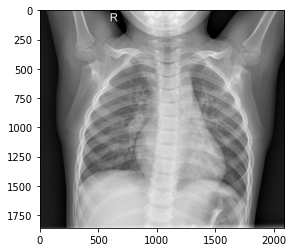

In [23]:
# Sample normal image
path = 'data/chest_pneumonia/train/normal'
img = cv2.imread(path + '/IM-0115-0001.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img, cmap='gray')
img.shape

In [24]:
# Basic info of the image
print('Image size:', img.shape)
print('Image data type:', img.dtype)

Image size: (1858, 2090)
Image data type: uint8


(250, 500)

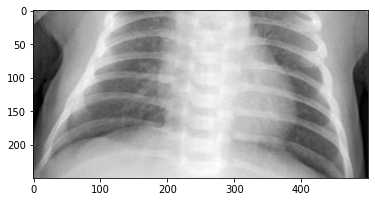

In [25]:
# Sample virus pneumonia image
path = 'data/chest_pneumonia/train/pneumonia'
img2 = cv2.imread(path + '/person281_virus_578.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img2, cmap='gray')
img2.shape

(439, 712)

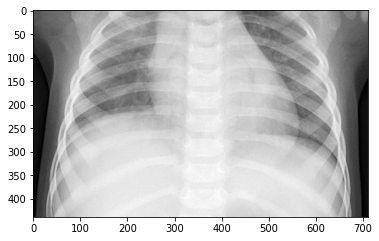

In [26]:
# Sample bacterial pneumonia image
path = 'data/chest_pneumonia/train/pneumonia'
img3 = cv2.imread(path + '/person1_bacteria_1.jpeg', 0) # 1 = color, 0 = gray, -1 = unchanged
plt.imshow(img3, cmap='gray')
img3.shape

In [27]:
# Path Stuff
path = 'data/chest_pneumonia'
in_list = os.listdir(path) # This returns a list with all of the elements of the path
in_list

['.DS_Store', 'test', 'train']

In [28]:
path = 'data/chest_pneumonia'
for i in os.listdir(path):
    if i != '.DS_Store':
        path2 = path + '/' + i
        for j in os.listdir(path2):
            if j != '.DS_Store':
                path3 = path2 + '/' + j
                print('\n' + path3)
                cont = 0
                    


data/chest_pneumonia/test/pneumonia

data/chest_pneumonia/test/normal

data/chest_pneumonia/train/pneumonia

data/chest_pneumonia/train/normal


In [29]:
# convert the grayscale image to binary image
ret, thresh = cv2.threshold(img ,127,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put text and highlight the center
cv2.circle(img, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

# Image processing

## Adjusting so all images are the same size

(1608, 1590)

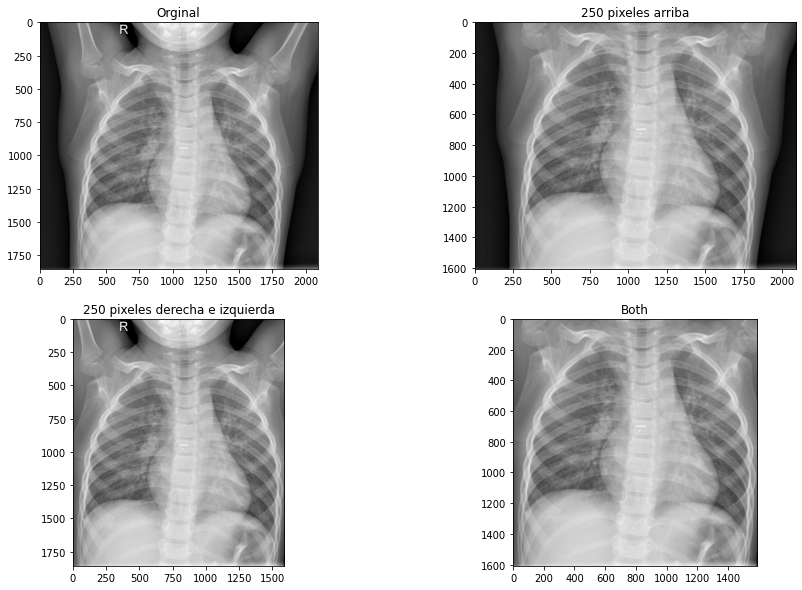

In [30]:
# Test to see if any information is lost when cropping
plt.figure(figsize=[15, 10])
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Orginal')
plt.subplot(222)
plt.imshow(img[250:,:], cmap='gray')
plt.title('250 pixeles arriba')
plt.subplot(223)
plt.imshow(img[:, 250:-250], cmap='gray')
plt.title('250 pixeles derecha e izquierda')
plt.subplot(224)
plt.imshow(img[250:, 250:-250], cmap='gray')
plt.title('Both')
img[250:, 250:-250].shape

In [31]:
# Normal training images

import statistics as stat
sizes = []
shapes = []
rows = []
cols = []
paths = []
labels = []
path_norm = 'data/chest_pneumonia/train/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 2338
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 84681 pixels, shape:  (291, 291)
Mean image size: 1411561 pixels
Median image size: 1486412.0 pixels, shape:  (1062, 1350)


In [32]:
# Pneumonia training images

path_pneu = 'data/chest_pneumonia/train/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 7217
Largest image: 7532028 pixels, shape: (2663, 2373)
Smallest image: 48768 pixels, shape:  (127, 384)
Mean image size: 1041032 pixels
Median image size: 812928 pixels, shape:  (736, 1070)


In [33]:
train_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
train_df.to_csv('training_data.csv', index=False)

In [34]:
pd.read_csv('training_data.csv')

,path,shape,rows,columns,label
0,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
1,data/chest_pneumonia/train/normal/NORMAL2-IM-0...,"(2234, 2359)",2234,2359,Healthy
2,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
3,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
4,data/chest_pneumonia/train/normal/train_h_aug_...,"(291, 291)",291,291,Healthy
...,...,...,...,...,...
7212,data/chest_pneumonia/train/pneumonia/train_vir...,"(291, 291)",291,291,Virus
7213,data/chest_pneumonia/train/pneumonia/person132...,"(712, 1112)",712,1112,Virus
7214,data/chest_pneumonia/train/pneumonia/person772...,"(592, 1000)",592,1000,Virus
7215,data/chest_pneumonia/train/pneumonia/person501...,"(1024, 1584)",1024,1584,Virus


In [35]:
# Normal test images
import statistics as stat
sizes = []
shapes = []
paths = []
labels = []
rows = []
cols = []
path_norm = 'data/chest_pneumonia/test/normal'
for i in os.listdir(path_norm):
    image = cv2.imread(path_norm + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_norm + '/' + i)
    labels.append('Healthy')
    rows.append(image.shape[0])
    cols.append(image.shape[1])
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', int(stat.median(sizes)), 'pixels, shape: ',  sorted(shapes)[int(len(shapes) / 2)])

Total images: 234
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 488064 pixels, shape:  (496, 984)
Mean image size: 2608497 pixels
Median image size: 2327083 pixels, shape:  (1318, 1754)


In [36]:
# Pneumonia test images

path_pneu = 'data/chest_pneumonia/test/pneumonia'
for i in os.listdir(path_pneu):
    image = cv2.imread(path_pneu + '/' + i, 0)
    sizes.append(image.size)
    shapes.append(image.shape)
    paths.append(path_pneu + '/' + i)
    rows.append(image.shape[0])
    cols.append(image.shape[1])
    if 'bact' in i:
        labels.append('Bacterial')
    elif 'vir' in i:
        labels.append('Virus')
print('Total images:', len(sizes))
print('Largest image:', max(sizes), 'pixels, shape:', max(shapes))
print('Smallest image:', min(sizes), 'pixels, shape: ', min(shapes))
print('Mean image size:', int(stat.mean(sizes)), 'pixels')
print('Median image size:', stat.median(sizes), 'pixels, shape: ', sorted(shapes)[int(len(shapes) / 2)])

Total images: 722
Largest image: 6828621 pixels, shape: (2713, 2517)
Smallest image: 84681 pixels, shape:  (291, 291)
Mean image size: 1346794 pixels
Median image size: 960576.0 pixels, shape:  (808, 1232)


In [37]:
test_df = pd.DataFrame({'path': paths, 'shape': shapes, 'rows': rows, 'columns': cols, 'label': labels})
test_df.to_csv('test_data.csv', index=False)

In [38]:
test_df.tail()

,path,shape,rows,columns,label
717,data/chest_pneumonia/test/pneumonia/person120_...,"(688, 1024)",688,1024,Bacterial
718,data/chest_pneumonia/test/pneumonia/person171_...,"(672, 1088)",672,1088,Bacterial
719,data/chest_pneumonia/test/pneumonia/person109_...,"(808, 1256)",808,1256,Bacterial
720,data/chest_pneumonia/test/pneumonia/person83_b...,"(648, 912)",648,912,Bacterial
721,data/chest_pneumonia/test/pneumonia/person112_...,"(640, 952)",640,952,Bacterial


## Augmentation in case labels have different amounts of images

In [39]:
path_pneu = 'data/chest_pneumonia/train/pneumonia'
path_norm = 'data/chest_pneumonia/train/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'vir' in i: 
        vir += 1
    elif 'bact' in i:
        bact += 1
print('Train images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)    
print('Total:', norm + vir + bact)   

Train images:

Normal Images: 2338
Virus images: 2341
Bacteria images: 2538
Total: 7217


In the training set, normal images and virus pneumonia images are equated, but bacterial pneumonia images are a lot higher, this can lead to our model being biased, so we will have to augment the normal and virus images to have a similar or equal number of images

In [40]:
path_pneu = 'data/chest_pneumonia/test/pneumonia'
path_norm = 'data/chest_pneumonia/test/normal'
vir = 0
bact = 0
norm = len(os.listdir(path_norm))
for i in os.listdir(path_pneu):
    if 'vir' in i: 
        vir += 1
    elif 'bact' in i:
        bact += 1
print('Test images:\n')
print('Normal Images:', norm)
print('Virus images:', vir)
print('Bacteria images:', bact)
print('Total:', norm + vir + bact)  

Test images:

Normal Images: 234
Virus images: 246
Bacteria images: 242
Total: 722


### Rotations

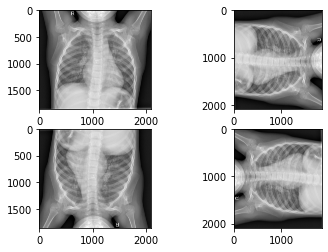

In [41]:
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow (cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE), cmap='gray')
plt.subplot(223)
plt.imshow(cv2.rotate(img, cv2.ROTATE_180), cmap='gray')
plt.subplot(224)
plt.imshow (cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE), cmap='gray')

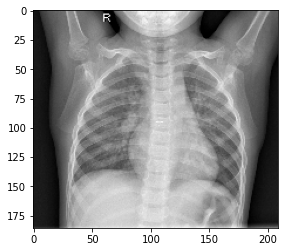

In [42]:
plt.imshow(cv2.resize(img, None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC),cmap='gray')

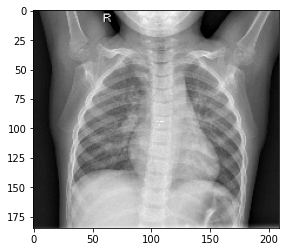

In [43]:
# The same thing
height, width = img.shape[:2]
plt.imshow(cv2.resize(img, (int(0.1*width), int(0.1*height)), interpolation = cv2.INTER_CUBIC),cmap='gray')

In [44]:
for i in range(10):
    print('-------------------------------------------------')
    print(i)
    globals()['img' + str(i)] = cv2.imread(train_df['path'][i], 0)
    print(globals()['img' + str(i)].shape)
    globals()['img' + str(i)] = cv2.resize(globals()['img' + str(i)], None,fx=0.1, fy=0.1, interpolation = cv2.INTER_CUBIC)
    print(globals()['img' + str(i)].shape)

-------------------------------------------------
0
(291, 291)
(29, 29)
-------------------------------------------------
1
(2234, 2359)
(223, 236)
-------------------------------------------------
2
(291, 291)
(29, 29)
-------------------------------------------------
3
(291, 291)
(29, 29)
-------------------------------------------------
4
(291, 291)
(29, 29)
-------------------------------------------------
5
(291, 291)
(29, 29)
-------------------------------------------------
6
(1067, 1422)
(107, 142)
-------------------------------------------------
7
(291, 291)
(29, 29)
-------------------------------------------------
8
(1357, 1828)
(136, 183)
-------------------------------------------------
9
(1495, 1854)
(150, 185)


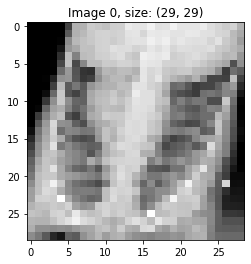

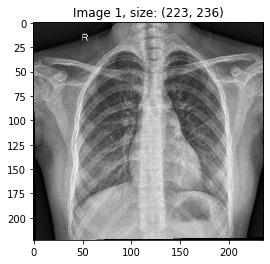

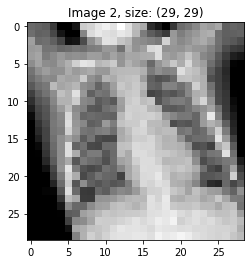

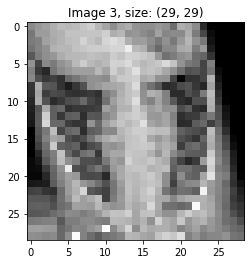

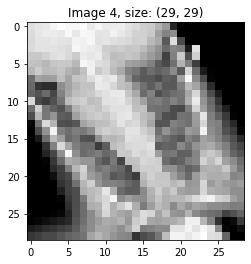

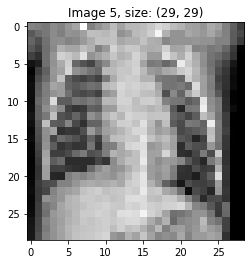

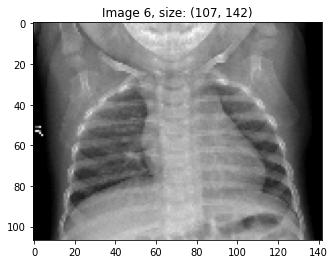

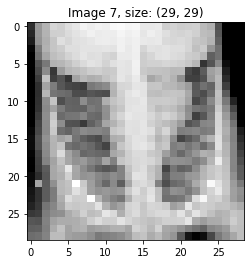

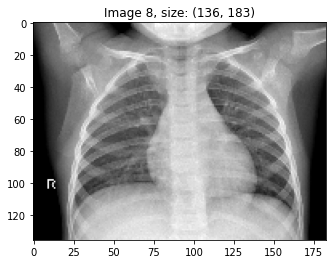

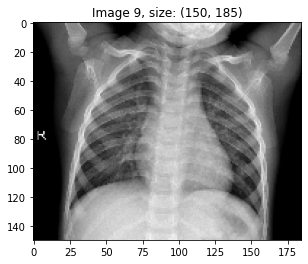

In [45]:
for i in range(10):
    plt.figure()
    plt.imshow(globals()['img' + str(i)], cmap='gray')
    plt.title('Image ' + str(i) + ', size: ' + str(globals()['img' + str(i)].shape))

<ipython-input-57-f94321e631dc>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  img1 == cv2.resize(img1, dsize=(236, 233), interpolation= cv2.INTER_CUBIC)


False

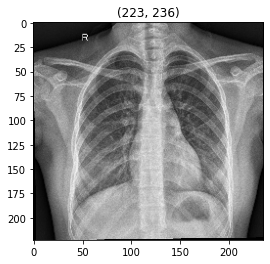

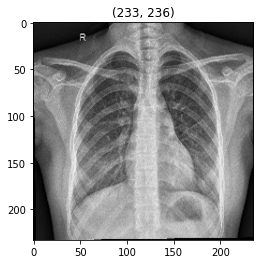

In [57]:
plt.figure()
plt.imshow(img1, cmap='gray')
plt.title(img1.shape)
plt.figure()
plt.imshow(cv2.resize(img1, dsize=(236, 233), interpolation= cv2.INTER_CUBIC), cmap='gray')
plt.title(cv2.resize(img1, dsize=(236, 233), interpolation= cv2.INTER_CUBIC).shape)
img1 == cv2.resize(img1, dsize=(236, 233), interpolation= cv2.INTER_CUBIC)

## Adjusting contrast of images